# Jupyter Notebooks and X11

X11 is a client/server windowing system. The client communicates with the server using the X Window System Core Protocol. This architecture allows the X11 server to accept drawing commands from a remote client and render the GUI drawing commands on the hardware which the server controls/uses, e.g. monitor, keyboard and mouse. The X11 server renders the drawing commands onto a frame buffer. This buffer allows for caching drawing results. At the appropriate time, the buffer contents are flushed video RAM.

This architecture allowed for the implementation of a virtual Frame Buffer and an accompanying virtual server. This allows X11 applications to run without actual display hardware. This is the only way to use X11 (including Qt) applications in the context of a Jupyter notebook. There is no other way.

If someone implemented an X11 server designed for use with Jupyter notebooks, the display of X11 applications within the notebook may be possible. This potential server would behave like XQuartz (the X11 server implementation for MacOS which renders X11 widgets using the native GUI environment on MacOS).

This notebook shows how virtual frame buffers can be used to run X11 applications within a Jupyter notebook. The application used is casaplotms, a Qt application.

The first step is to perform som configuration steps:

In [14]:
# Installation
import os
import sys
print("performing setup (tasks a few minutes)...")
!{sys.executable} -m pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casaplotms
!{sys.executable} -m pip install pyvirtualdisplay

performing setup (tasks a few minutes)...
  Using cached https://casa-pip.nrao.edu/repository/pypi-casa-release/packages/casaplotms/1.0.1/casaplotms-1.0.1-py3-none-linux_x86_64.whl
  Using cached https://casa-pip.nrao.edu/repository/pypi-casa-release/packages/casatasks/6.0.0.27/casatasks-6.0.0.27-py3-none-any.whl
  Using cached https://casa-pip.nrao.edu/repository/pypi-casa-release/packages/93/4b/52da6b1523d5139d04e02d9e26ceda6146b48f2a4e5d2abfdf1c7bac8c40/matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://casa-pip.nrao.edu/repository/pypi-casa-release/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://casa-pip.nrao.edu/repository/pypi-casa-release/packages/ae/23/147de658aabbf968324551ea22c0c13a00284c4ef49a77002e91f79657b7/kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl


In [17]:
import pip
for i in pip.get_installed_distributions(local_only=True):
    print(i)
import pyvirtualdisplay

PyXB 1.2.4
javapackages 4.3.2
tornado 6.0.4
QtPy 1.9.0
pyzmq 19.0.0
pyrsistent 0.16.0
Pygments 2.6.1
MarkupSafe 1.1.1
Jinja2 2.11.2
zipp 3.1.0
widgetsnbextension 3.5.1
webencodings 0.5.1
wcwidth 0.1.9
traitlets 4.3.3
testpath 0.4.4
terminado 0.8.3
six 1.14.0
Send2Trash 1.5.0
qtconsole 4.7.3
python-dateutil 2.8.1
pyparsing 2.4.7
ptyprocess 0.6.0
prompt-toolkit 3.0.5
prometheus-client 0.7.1
pickleshare 0.7.5
pexpect 4.8.0
parso 0.7.0
pandocfilters 1.4.2
packaging 20.3
notebook 6.0.3
nbformat 5.0.6
nbconvert 5.6.1
mistune 0.8.4
jupyter 1.0.0
jupyter-core 4.6.3
jupyter-console 6.1.0
jupyter-client 6.1.3
jsonschema 3.2.0
jedi 0.17.0
ipywidgets 7.5.1
ipython 7.13.0
ipython-genutils 0.2.0
ipykernel 5.2.1
importlib-metadata 1.6.0
entrypoints 0.3
defusedxml 0.6.0
decorator 4.4.2
bleach 3.1.5
backcall 0.1.0
attrs 19.3.0
setuptools 39.2.0
pip 9.0.3


## Setup Virtual Frame Buffer
Setup a virtual frame buffer...

In [18]:
from pyvirtualdisplay import Display
display = Display(visible=0,size=(2048,2048))
display.start( )

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '2048x2048x24', ':1013'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '2048x2048x24', ':1013'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

## Get Data

Somehow data must be made available...

In [19]:
print("download some data...")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")
print('complete')

download some data...
complete


## Plot Data

Start X11 application and plot data...

In [21]:
from casaplotms import plotms
print('making the plot...')
plotms(vis='sis14_twhya_calibrated_flagged.ms',plotfile='sis14_twhya_calibrated_flagged.jpg',showgui=False,highres=True,overwrite=True)
print('complete')

making the plot...
casaplotms: 0.0.0.0:34665
Plot file /home/hypnos/dschieb/casa/casa-ensemble/test-virtualdisplay/sis14_twhya_calibrated_flagged.jpg
exporting the plot
complete


## Display the Exported Raster Image

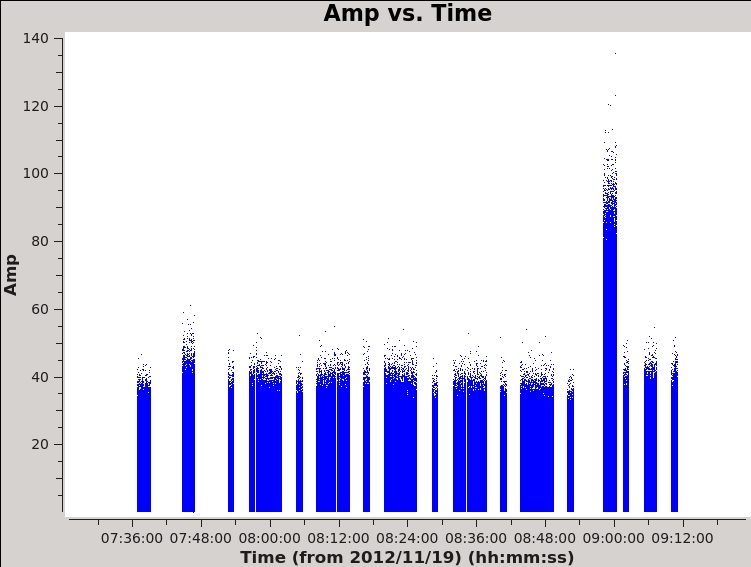

In [22]:
from IPython.display import Image
Image(filename="sis14_twhya_calibrated_flagged.jpg")